# Example State Machine Usage



In [18]:
from state_machine import StateMachine, State, Event, display_machine

In [19]:
receptionist = StateMachine( 'Receptionist' )

wait_for_phone      = receptionist.create_state('Wait For Phone')
take_order          = receptionist.create_state('Take Order')

enter_lasagne_order = receptionist.create_state('Enter Lasagne Order')
enter_pizza_order   = receptionist.create_state('Enter Pizza Order')

wait_for_phone.add_transition_to(take_order, 'phone rings')
take_order.add_transition_to( enter_lasagne_order, 'customer_wants_lasagne')
take_order.add_transition_to( enter_pizza_order, 'customer_wants_pizza' )

receptionist.initial_state = wait_for_phone

INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.State'>


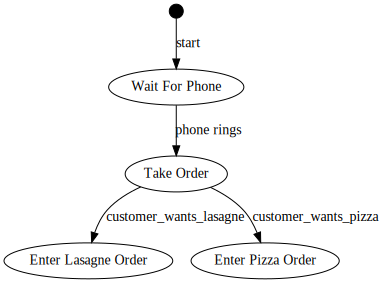

In [20]:
display_machine(receptionist)

### Receptionist waits, but only receives silence

Broadcast silence on the phone.

In [21]:
evt = Event('phone is silent')
receptionist.set_state(wait_for_phone)
receptionist.notify(evt)
assert wait_for_phone==receptionist.current_state

### Phone rings, so receptionist takes order

Broadcast a ringing phone.

In [22]:
evt = Event('phone rings')
receptionist.set_state(wait_for_phone)
receptionist.notify(evt)
assert take_order==receptionist.current_state, receptionist.current_state

INFO:default:Receptionist transitioning to state State:Take Order


### Customer Wants Pizza

Take an order from a customer who wants pizza.

In [23]:
evt = Event('customer_wants_pizza')
receptionist.set_state( take_order )
receptionist.notify(evt)
assert enter_pizza_order==receptionist.current_state

INFO:default:Receptionist transitioning to state State:Enter Pizza Order


### Customer Wants Lasagne

Take an order from a customer who wants pizza.

In [24]:
evt = Event('customer_wants_lasagne')
receptionist.set_state( take_order )
receptionist.notify(evt)
assert enter_lasagne_order==receptionist.current_state

INFO:default:Receptionist transitioning to state State:Enter Lasagne Order


### The Full Pizza Sequence

Test a ringing phone, followed by a customer who wants pizza.

In [25]:
receptionist.set_state( wait_for_phone )
receptionist.notify(Event('silence'))
receptionist.notify(Event('phone rings'))
receptionist.notify(Event('customer_wants_pizza'))
assert enter_pizza_order==receptionist.current_state

INFO:default:Receptionist transitioning to state State:Take Order
INFO:default:Receptionist transitioning to state State:Enter Pizza Order


### The Full Pizza Sequence

Test a ringing phone, followed by a customer who wants lasagne.

In [26]:
receptionist.set_state( wait_for_phone )
receptionist.notify(Event('silence'))
receptionist.notify(Event('phone rings'))
receptionist.notify(Event('customer_wants_lasagne'))
assert enter_lasagne_order==receptionist.current_state

INFO:default:Receptionist transitioning to state State:Take Order
INFO:default:Receptionist transitioning to state State:Enter Lasagne Order
